# Intorduction

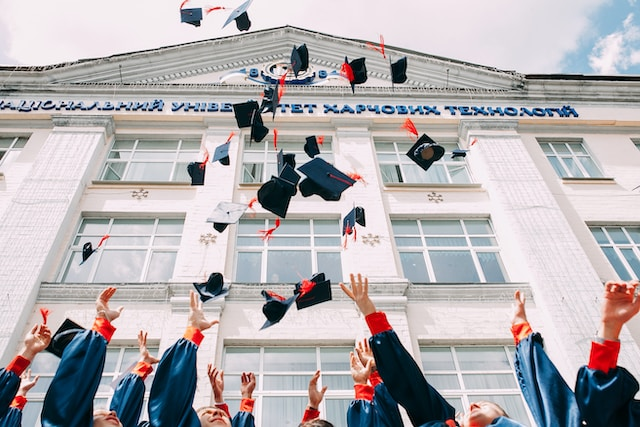

Of all the universities in the world, which are the best?\
Assessing universities and creating their rankings is an incredibly complex task, fraught with political influences and often sparking controversies. There are numerous different ranking systems, both national and international, and they frequently contradict each other. Additionally, it's worth noting that university rankings often provoke discussions and disputes because the criteria for evaluation and the methodology for awarding rankings vary depending on the source. There is no single perfect method that would be objective and fair to all universities worldwide.\
I will conduct an analysis of university rankings and the data available in those rankings to approach a conclusion about which university can be considered the best.

<br>

# Read data

All the data used in my analysis is sourced from and belongs to https://www.kaggle.com/datasets/mylesoneill/world-university-rankings.

In [732]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [733]:
cwurData = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/cwurData.csv')
educationExpenditure = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/education_expenditure_supplementary_data.csv')
educationalAttainment = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/educational_attainment_supplementary_data.csv')
schoolCountry = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/school_and_country_table.csv')
shanghaiData = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/shanghaiData.csv')
timesData = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/World-University-Rankings-Analysis/main/Data/timesData.csv')

<br>

### Data display

In [734]:
pip install ipywidgets

In [735]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [736]:
# Create bookmarks
tab_layout = widgets.Layout(width='90%')
tab = widgets.Tab(layout=tab_layout)
tab.children = [
    widgets.Output() for i in range(6)
]

# Functions that support changing tabs
def on_tab_selected(change):
    selected_tab = change.new
    with tab.children[selected_tab]:
        clear_output()
        if selected_tab == 0:
            display(cwurData.head(10))
        elif selected_tab == 1:
            display(educationExpenditure.head(10))
        elif selected_tab == 2:
            display(educationalAttainment.head(10))
        elif selected_tab == 3:
            display(schoolCountry.head(10))
        elif selected_tab == 4:
            display(shanghaiData.head(10))
        elif selected_tab == 5:
            display(timesData.head(10))

# Assigning a function to change the tab
tab.observe(on_tab_selected, names='selected_index')

# Setting tab labels
tab.set_title(0, 'cwurData')
tab.set_title(1, 'educationExpenditure')
tab.set_title(2, 'educationalAttainment')
tab.set_title(3, 'schoolCountry')
tab.set_title(4, 'shanghaiData')
tab.set_title(5, 'timesData')

display(tab)

**Summary of the data:**\
We have 6 data files in University Rankings dataset, as following:

* cwurData.csv (2200 rows, 14 columns)
* education_expenditure_supplementary_data.csv (333 rows, 9 columns)
* educational_attainment_supplementary_data.csv (79055 rows, 29 columns)
* school_and_country_table.csv (818 rows, 2 columns)
* shanghaiData.csv (4897 rows, 11 columns)
* timesData.csv (2603 rows, 14 columns)

In [737]:
tab_layout = widgets.Layout(width='80%')
tab = widgets.Tab(layout=tab_layout)
tab.children = [
    widgets.Output() for i in range(6)]

def on_tab_selected(change):
    selected_tab = change.new
    with tab.children[selected_tab]:
        clear_output()
        if selected_tab == 0:
            display(cwurData.info())
        elif selected_tab == 1:
            display(educationExpenditure.info())
        elif selected_tab == 2:
            display(educationalAttainment.info())
        elif selected_tab == 3:
            display(schoolCountry.info())
        elif selected_tab == 4:
            display(shanghaiData.info())
        elif selected_tab == 5:
            display(timesData.info())

tab.observe(on_tab_selected, names='selected_index')

tab.set_title(0, 'cwurData')
tab.set_title(1, 'educationExpenditure')
tab.set_title(2, 'educationalAttainment')
tab.set_title(3, 'schoolCountry')
tab.set_title(4, 'shanghaiData')
tab.set_title(5, 'timesData')

display(tab)

<br>

## The Center for World University Rankings

**The Center for World University Rankings (CWUR)** is a prominent consulting organization and publisher that produces one of the largest academic rankings of global universities. This ranking is widely recognized in the academic and higher education community, providing valuable insights into the performance and reputation of universities worldwide.

In [738]:
# Selecting top 5 universities according to CWUR
cwurTop5 = cwurData.groupby('year')[['year', 'institution', 'world_rank']].apply(lambda x: x.nsmallest(5, 'world_rank')).reset_index(drop=True)
cwurTop5.head()

,year,institution,world_rank
0,2012,Harvard University,1
1,2012,Massachusetts Institute of Technology,2
2,2012,Stanford University,3
3,2012,University of Cambridge,4
4,2012,California Institute of Technology,5


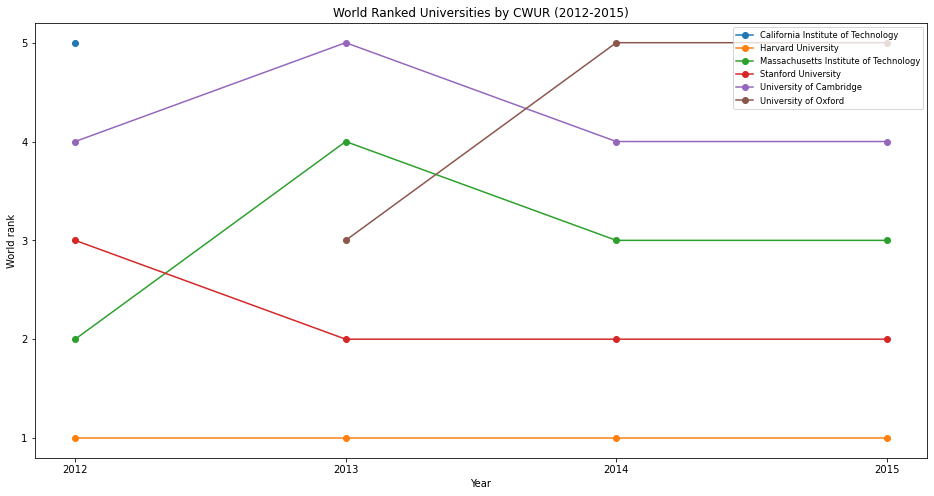

In [739]:
plt.figure(figsize=(16, 8))

for institution, data in cwurTop5.groupby('institution'):
    plt.plot(data['year'], data['world_rank'], label=institution, marker = 'o')
    
plt.title('World Ranked Universities by CWUR (2012-2015)')
plt.xlabel('Year')
plt.ylabel('World rank')
plt.legend(loc='upper right', fontsize='small')

plt.gca().get_xaxis().get_major_locator().set_params(integer=True)
plt.gca().get_yaxis().get_major_locator().set_params(integer=True)

Based on the data spanning from 2012 to 2015, it is consistently evident that Harvard University maintains its position at the top rank without any changes during this period.\
In 2013, Stanford University advanced to the second position in the ranking and continued to hold that position until 2015.\
University California Institute of Technology dropped out of the top 5 after occupying the 5th position in 2012. In its place, University of Oxford climbed into the top 5 (holding the 3rd position in 2013).

<br>

#### Top 10 based on World rank for each year. 

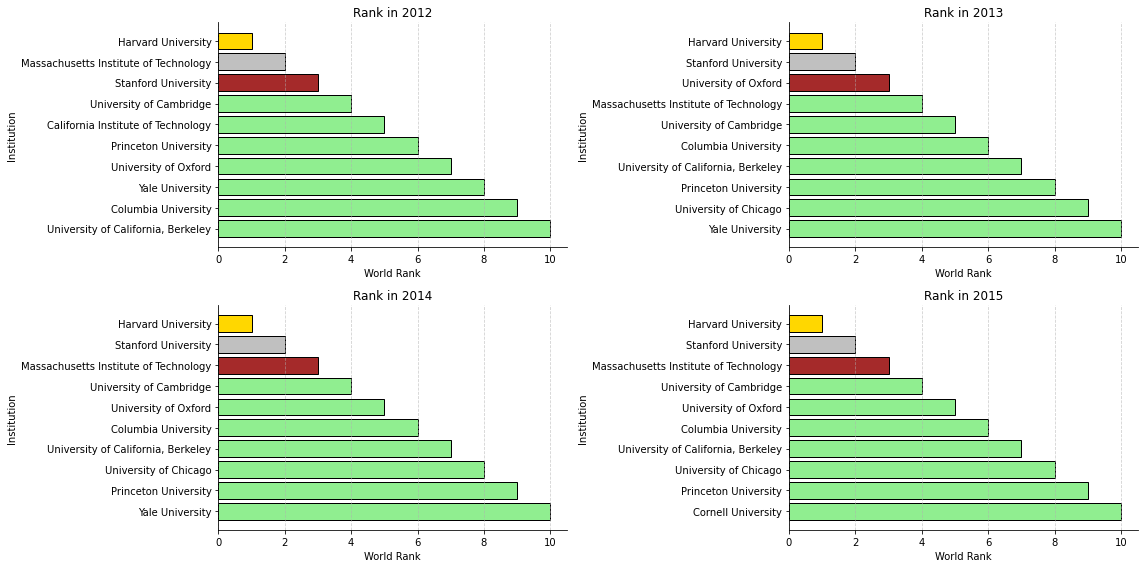

In [740]:
def cwur_plot_year(nYear, ax):
    data_year = cwurData[cwurData['year'] == nYear].nsmallest(10, 'world_rank')
    
    colors = ['gold' if idx == 0 else 'silver' if idx == 1 else 'brown' if idx == 2 else 'lightgreen' for idx in range(len(data_year))]
    
    ax.barh(data_year['institution'], data_year['world_rank'], color=colors, edgecolor='black')
    ax.set_xlabel('World Rank')
    ax.set_ylabel('Institution')
    ax.set_title(f'Rank in {nYear}')
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

years = [2012, 2013, 2014, 2015]
for i in range(2):
    for j in range(2):
        cwur_plot_year(years[i*2 + j], axs[i, j])

plt.tight_layout()

<br>

#### Country ranks

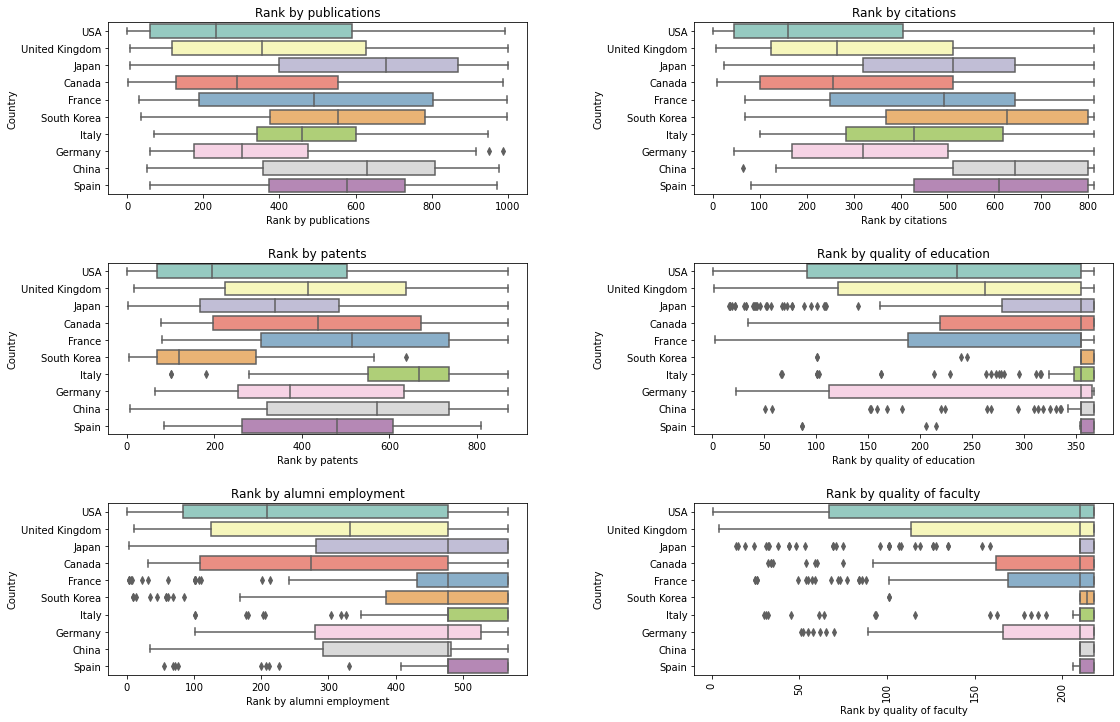

In [741]:
country_publications = cwurData.groupby('country')['publications'].count().reset_index()
top_countries_cwur = country_publications.nlargest(10, 'publications')
filtered_data_top10 = cwurData[cwurData['country'].isin(top_countries['country'])]

# Create boxplots
plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, col in enumerate(['publications', 'citations', 'patents', 'quality_of_education', 'alumni_employment', 'quality_of_faculty']):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=col, y='country', data=filtered_data_top10, palette=sns.color_palette("Set3"))
    plt.title(f'Rank by {col.replace("_", " ")}')
    plt.xlabel(f'Rank by {col.replace("_", " ")}')
    plt.ylabel('Country')

plt.xticks(rotation=90)
plt.show()

The United States leads (smaller values are better) the way in all three key research quality metrics – publications, citations, and patents. Following closely is the United Kingdom, excelling in all indicators except patents, where South Korea has a advantage. Canada secures the third spot in publications and citations.\
When it comes to the quality of education, the averages are quite close to the third and fourth quartiles, but there are numerous outliers in the first quartile, particularly noticeable in countries like Spain, China, Italy, and Japan for quality of education, and in Spain, South Korea, Italy, and France for alumni employment. For quality of faculty, outliers can be found in South Korea, Japan, Germany, France, and Canada.\
This suggests that, in these three categories, only a few universities in these countries perform exceptionally well, achieving lower (better) ranks. The majority of universities in these nations have average rankings above 200. However, the United States and the United Kingdom stand out as exceptions. They exhibit a wider range of rankings for quality of education and alumni employment, with much lower averages compared to the other top-ranking countries.

<br>

#### Number of universities

In [742]:
import plotly.express as px


max_num_universities = ccwur['num_universities'].max()
ccwur = ccwur.sort_values(by='year')
#ccwur = cwurData.groupby(['country', 'year'])['world_rank'].count().reset_index()
#ccwur.columns = ['country', 'year', 'num_universities']

# Creating an interactive choropleth chart
fig = px.choropleth(ccwur, 
                    locations="country", 
                    locationmode="country names",
                    color="num_universities",
                    color_continuous_scale="RdYlGn",
                    range_color=[0, max_num_universities],
                    hover_name="country",
                    animation_frame="year")

fig.update_geos(showcoastlines=True, coastlinecolor="gray", showland=True)

fig.update_layout(
    title='Number of universities<br>Source: <a href="http://cwur.org/">Council of World University Ranking</a>',
    coloraxis_colorbar=dict(title='Number of universities in top', tickprefix=''),)

fig.show()

US is leading the countries top, followed by UK, Canada, France, Germany, Spain and China (last years)

<br>

#### What has the greatest impact on the place in the ranking

<AxesSubplot:>

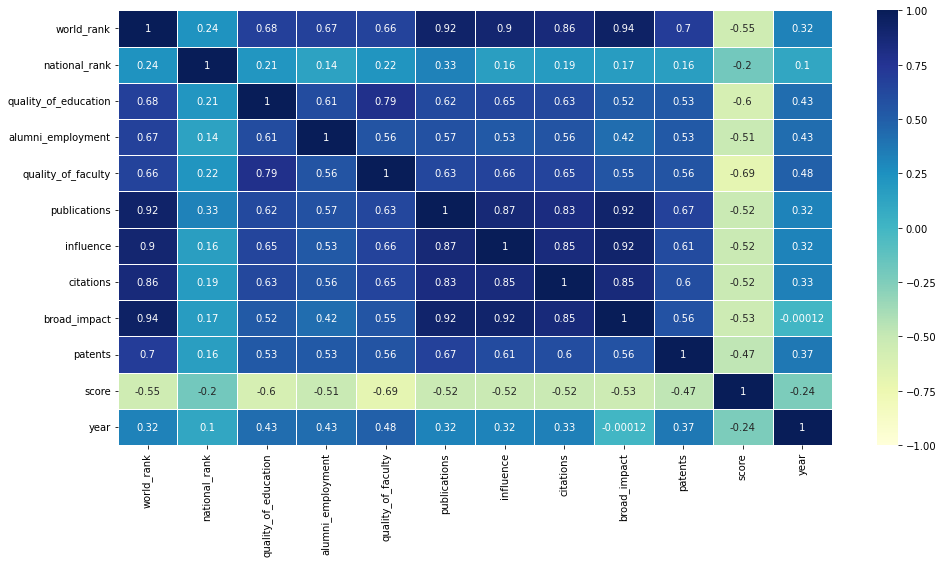

In [743]:
from matplotlib.colors import LinearSegmentedColormap, Normalize

fig, ax = plt.subplots(figsize=(16, 8))
norm = Normalize(vmin=-1, vmax=1)

sns.heatmap(cwurData.corr(), annot=True, cmap='YlGnBu', linewidths=1, norm=norm)

Factors publications, influence, and broad impact have the most significant influence on the ranking position, as indicated by a correlation coefficient of at least 0.9.

<br>

#### Linear regression

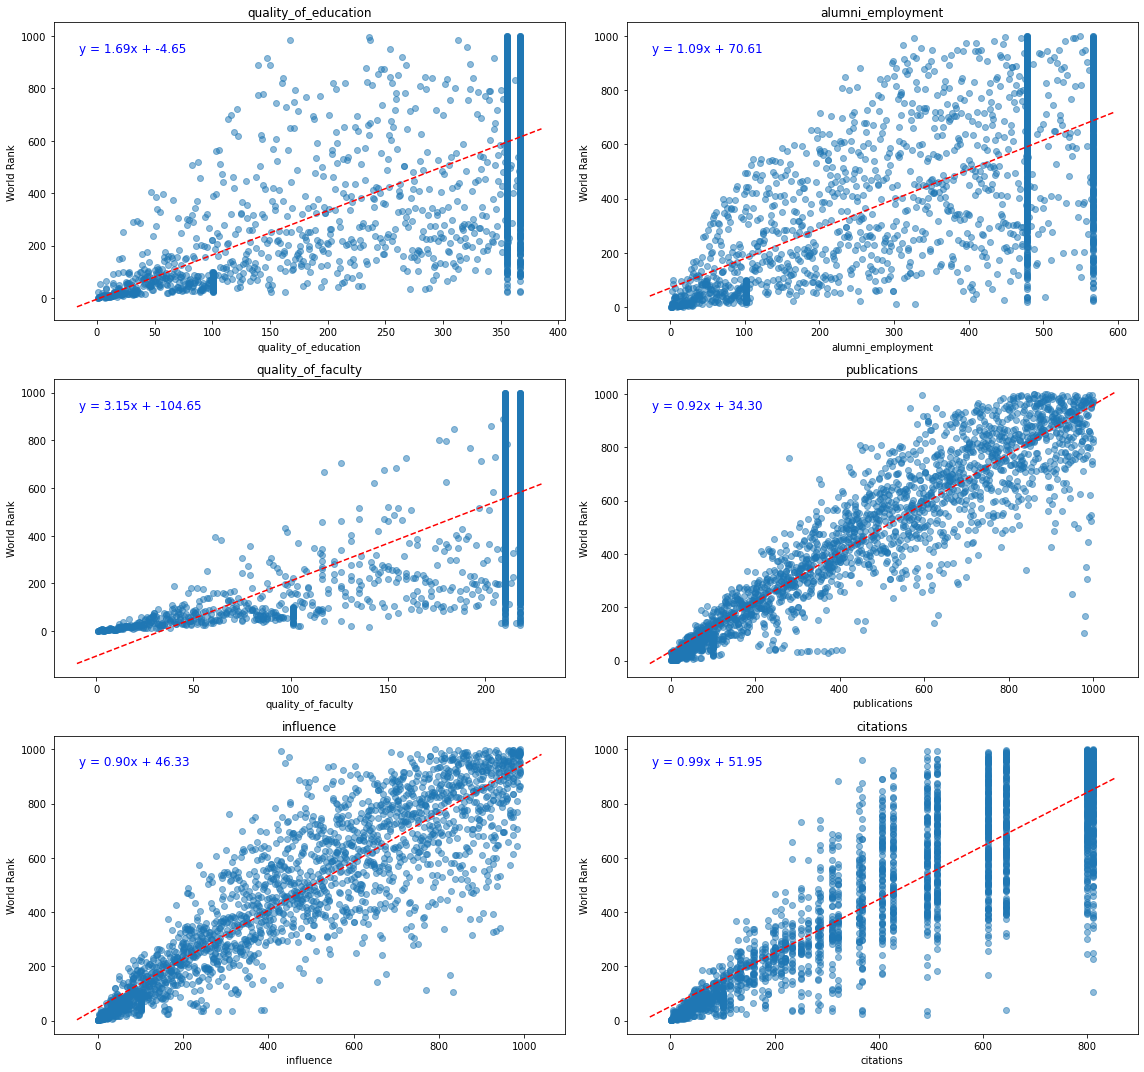

In [744]:
from scipy.stats import linregress

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 15))

columns = cwurData.columns[4:10]

for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]
    ax.scatter(cwurData[col], cwurData['world_rank'], alpha=0.5)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('World Rank')

    # Create linear regression
    slope, intercept, r_value, p_value, std_err = linregress(cwurData[col], cwurData['world_rank'])
    x_values = np.array(ax.get_xlim())
    y_values = intercept + slope * x_values
    ax.plot(x_values, y_values, color='red', linestyle='--')
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    ax.annotate(equation_text, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='blue')

plt.tight_layout()
plt.show()

Interpretation:
* If **the quality of education** increases by one unit, the university will drop in the ranking by an average of 1.69 places
* If **the alumni employment** increases by one unit, the university will drop in the ranking by an average of 1.09 places
* If **the quality of faculty** increases by one unit, the university will drop in the ranking by an average of 3.15 places
* If **the publications** increases by one unit, the university will drop in the ranking by an average of 0.92 places
* If **the influence** increases by one unit, the university will drop in the ranking by an average of 0.9 places
* If **the citation** increases by one unit, the university will drop in the ranking by an average of 0.99 places

<br>

#### The biggest advancement in the ranking

In [745]:
cwurData.sort_values(by=['year', 'world_rank'], ascending=[True, True], inplace=True)

# Grouping data by year and calculating the difference in ranking places
cwurData['rank_diff'] = cwurData.groupby('institution')['world_rank'].diff().fillna(0)

top_10_rank_increase = cwurData[cwurData['rank_diff'] < 0]

# Grouping data by year and university and calculating the total difference in places
top_10_rank_increase = top_10_rank_increase.groupby(['year', 'institution'])['rank_diff'].sum().reset_index()

top_10_rank_increase = top_10_rank_increase.sort_values(by='rank_diff', ascending=True)
top_10_rank_increase = top_10_rank_increase.head(10)
top_10_rank_increase

,year,institution,rank_diff
276,2015,Peking Union Medical College,-338.0
424,2015,University of Lübeck,-207.0
390,2015,"University of Eastern Piedmont Amedeo Avogadro""""",-180.0
286,2015,"Putra University, Malaysia",-168.0
462,2015,University of Oldenburg,-165.0
302,2015,Sharif University of Technology,-136.0
453,2015,University of New England (Australia),-128.0
107,2015,Catholic University of Korea,-118.0
537,2015,University of Windsor,-111.0
496,2015,University of Seoul,-110.0


The most remarkable advancement in the global ranking over the span of four years was achieved by Peking Union Medical College with a staggering leap of 338 places in just one year. Notably, the remaining universities in positions 2 through 10 exhibited a more moderate range of improvement, with rankings increasing by approximately 110 to 210 places. Interestingly, it's worth noting that all ten of the most significant improvements occurred between 2014 and 2015.

<br>

#### The biggest drops in the ranking

In [746]:
cwurData.sort_values(by=['year', 'world_rank'], ascending=[True, True], inplace=True)

# Grouping data by year and calculating the difference in ranking places
cwurData['rank_diff'] = cwurData.groupby('institution')['world_rank'].diff().fillna(0)

top_10_rank_decrease = cwurData[cwurData['rank_diff'] > 0]

# Grouping data by year and university and calculating the total place difference
top_10_rank_decrease = top_10_rank_decrease.groupby(['year', 'institution'])['rank_diff'].sum().reset_index()

top_10_rank_decrease = top_10_rank_decrease.sort_values(by='rank_diff', ascending=False)
top_10_rank_decrease = top_10_rank_decrease.head(10)
top_10_rank_decrease

,year,institution,rank_diff
291,2015,Osaka City University,324.0
154,2015,Dankook University,233.0
150,2015,Cranfield University,197.0
424,2015,University of Hull,189.0
143,2015,Chung Yuan Christian University,179.0
545,2015,Yokohama National University,179.0
454,2015,University of Málaga,174.0
484,2015,"University of Science, Malaysia",167.0
224,2015,Kobe University,167.0
338,2015,Sogang University,153.0


The most significant decline in the global ranking over the span of four years was experienced by Osaka City University, with a staggering drop of 324 places in just one year. In this context, Dankook University also saw an exceptional decline of 233 places Notably, the remaining universities in positions 3 through 10 underwent a more moderate range of decline, with rankings decreasing by approximately 150 to 200 places. Interestingly, it's worth noting that all ten of the most significant declines occurred between 2014 and 2015.

<br>

## Shanghai Academic Rankings for World Universities (ARWU)

**The Shanghai Academic Rankings for World Universities (ARWU)** is based on six indicators, such as the number of Nobel Prize and Fields Medal laureates, the number of researchers among university staff, the number of articles published in high-impact scientific journals, and others.

In [747]:
shanghaiData.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


The Shanghai World Rankings for universities have a World Rank (smaller value is the best), a National Rank (per country, smaller value is best) and scores from 0 to 100 for:

* Total Score
* Alumni of an institution winning Nobel Prizes and Fields Medals (alumni)
* Staff of an institution winning Nobel Prizes and Fields Medals (awards)
* Highly Citated researchers (hici)
* Number of papers in Nature & Science papers (ns)
* Papers indexed in Science Citation Index-expanded and Social Science Citation Index (pub)
* Per capita academic performance of an institution (pcp)

<br>

#### Calculating missing values for Total Score

In [748]:
shanghaiData['total_score'].isna().sum() / len(shanghaiData['total_score'])

0.775168470492138

We need to solve an issue with a lot of rows with the Total Score missing (NA), 78 % of rows contain NA.
We can calculate the total_score. The formula is: \
<code>total_score = 0.1 * alumni + 0.2 * award + 0.2 * hici + 0.2 * ns + 0.2 * pub + 0.1 * pcp

In [749]:
# Calculate the Total Score from shanghaiData for the entries misising the Total Score
shanghaiData2 = shanghaiData.copy()

shanghaiData2['t_score'] = 0.1 * shanghaiData2['alumni'] + 0.2 * shanghaiData2['award'] + \
                              0.2 * shanghaiData2['hici'] + 0.2 * shanghaiData2['ns'] + \
                              0.2 * shanghaiData2['pub'] + 0.1 * shanghaiData2['pcp']

# Update the values in the "total_score" column for rows where the value is NaN to the values in the "t_score" column
shanghaiData2['total_score'].fillna(shanghaiData2['t_score'], inplace=True)

In [750]:
shanghaiData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      4875 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
 11  t_score          4875 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 459.2+ KB


In [751]:
# In some columns, values are missing (for 22 universities) so I decide to remove them
shanghaiData2 = shanghaiData2.dropna()

<br>

#### Top 10 universities based on total score

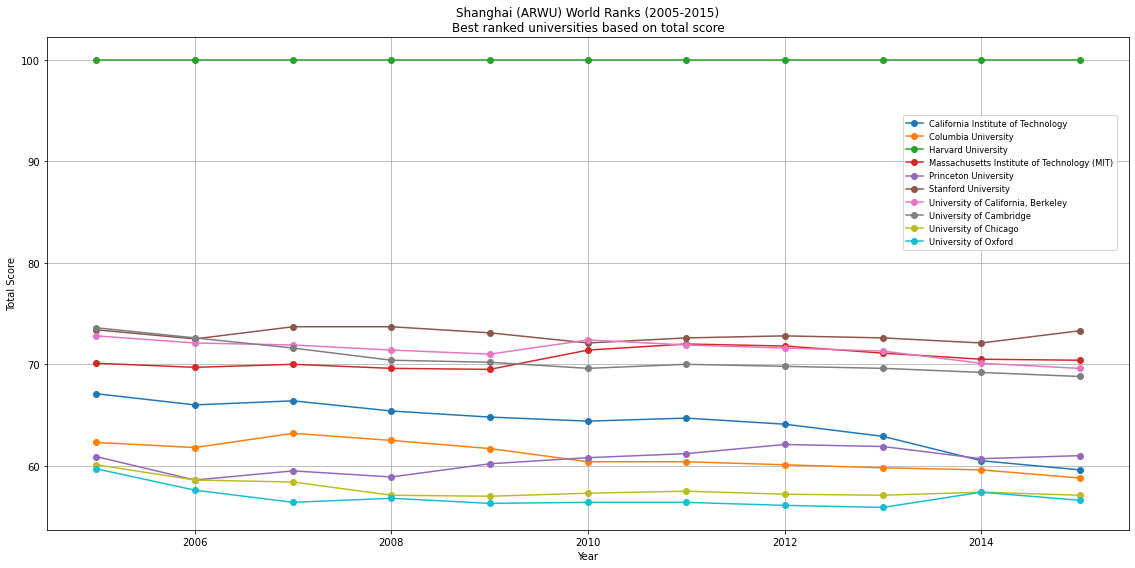

In [752]:
# Change the duplicate name "University of California-Berkeley" to "University of California, Berkeley
shanghaiData2.loc[shanghaiData2['university_name'] == "University of California-Berkeley", 'university_name'] = "University of California, Berkeley"

# Select top 10 universities in groups for each year
shanghai_top10 = shanghaiData2.groupby('year').apply(lambda x: x.nlargest(10, 'total_score')).reset_index(drop=True)


plt.figure(figsize=(16, 8))
for university_name, data in shanghai_top10.groupby('university_name'):
    plt.plot(data['year'], data['total_score'], label=university_name, marker='o')

plt.title("Shanghai (ARWU) World Ranks (2005-2015)\nBest ranked universities based on total score")
plt.xlabel("Year")
plt.ylabel("Total Score")
plt.legend(fontsize='small', bbox_to_anchor=(0.89, 0.85), loc='upper center')


plt.grid(True)
plt.tight_layout()

In terms of the total score, Harvard University is the top-ranked university, and it significantly outpaces the second-ranked Stanford University (by over 25 points). For the top 10 universities over the years, their total scores consistently remain above 55.

<br>

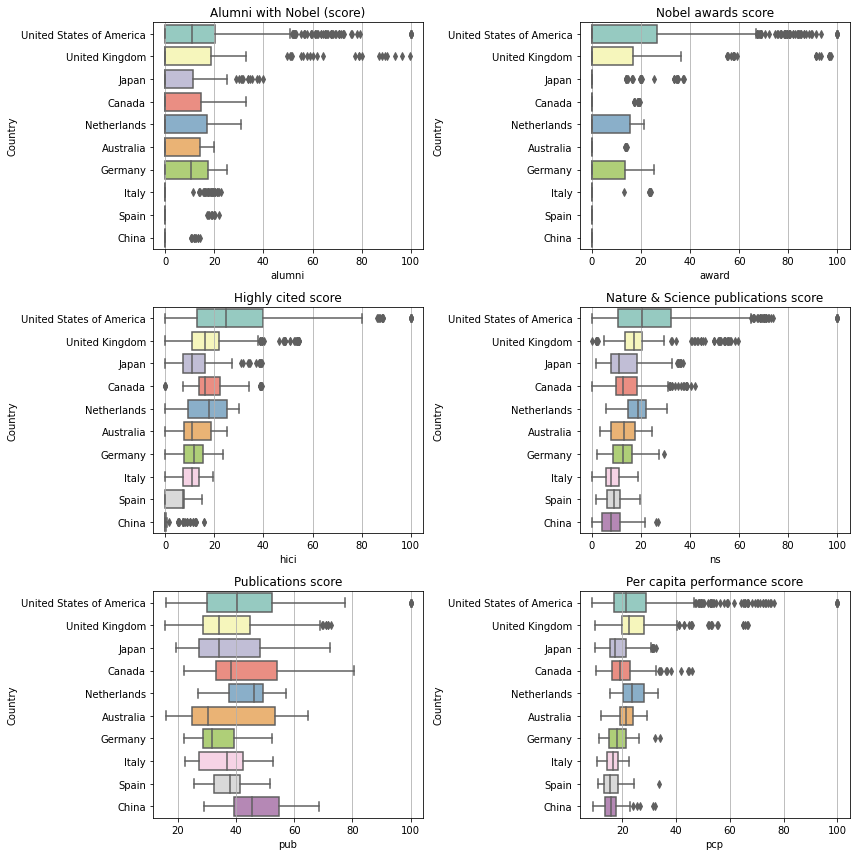

In [753]:
# Merge data
scData = pd.merge(shanghaiDataCld, schoolCountry, left_on="university_name", right_on="school_name")

# Grouping data and calculating the number of students
cs = scData.groupby("country")["alumni"].count().reset_index()
cs = cs.nlargest(10, "alumni")

def create_boxplot(data, x, y, title, x_label, y_label, ax):
    sns.boxplot(data=data, x=y, y=x, palette="Set3", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.tick_params(axis="y", rotation=0)
    ax.grid(axis="x")

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
categories_sc = ["alumni", "award", "hici", "ns", "pub", "pcp"]
titles = ["Alumni with Nobel (score)", "Nobel awards score", "Highly cited score",
          "Nature & Science publications score", "Publications score", "Per capita performance score"]

for i, ax in enumerate(axes.flatten()):
    if i < len(categories):
        create_boxplot(scData[scData["country"].isin(cs["country"])], "country", categories[i], titles[i], categories[i], "Country", ax)

plt.tight_layout()
plt.show()

We can observe significant outliers in various metrics, including Alumni with Nobel laureates, Nobel awards, Highly cited score, Nature & Science publication score, and Per capita performance score, particularly for universities in the United States, the United Kingdom, Japan, and Italy. Several of the top universities in these countries are recognized as scientific research powerhouses, exerting a dominant presence in the rankings.\
However, when it comes to the publication score, there is a more evenly distributed pattern among the top universities. Most countries in the top 10 have relatively aligned average scores, but there is greater variability in the actual scores. Notably, the Netherlands and China boast the highest average values in this category, while the United States and Australia exhibit the largest variances.

<br>

#### Number of universities

In [754]:
# Creating a DataFrame and grouping data
swur = scData.groupby(['country', 'year']).agg(
    nr=('total_score', 'count'),
    minw=('total_score', 'min'),
    maxw=('total_score', 'max'),
    avgw=('total_score', 'mean')
).reset_index()

# Creating hover column
swur['hover'] = swur.apply(lambda row: (
    f"Country: {row['country']}<br>"
    f"Year: {row['year']}<br>"
    f"Universities: {row['nr']}<br>"
    f"Min total score: {row['minw']}<br>"
    f"Max total score: {row['maxw']}<br>"
    f"Mean total score: {round(row['avgw'], 0)}<br>"
), axis=1)

swur.head(3)

,country,year,nr,minw,maxw,avgw,hover
0,Australia,2005,11,8.32,26.0,14.552727,Country: Australia<br>Year: 2005<br>Universiti...
1,Australia,2006,12,8.81,26.7,14.516667,Country: Australia<br>Year: 2006<br>Universiti...
2,Australia,2007,13,8.26,26.6,14.175385,Country: Australia<br>Year: 2007<br>Universiti...


In [755]:
fig = px.choropleth(swur, locations="country", locationmode="country names", color="nr",
                    hover_name="hover", projection="natural earth", animation_frame="year",
                    color_continuous_scale='RdYlGn', title='Number of universities')

fig.update_geos(showcoastlines=True, coastlinecolor="gray")
fig.update_layout(coloraxis_colorbar=dict(title='Number of universities', tickprefix=''))
fig.show()

<br>

<br>

## Times Higher Education (THE) University Rankings

**The Times Higher Education (THE) University Rankings** is an annual ranking of the world's top universities prepared by the British magazine "Times Higher Education." It has been published since 2010 and is widely recognized as a prestigious ranking in the field of higher education.\
The Times Higher Education data has information from 2011 to 2016. There is a World Rank (smaller values are better) and coeficients (between 0 and 100) for:

* Teaching (teaching/the learning environment)
* International Outlook (international/staff, students and research)
* Research (research/volume, income and reputation)
* Citations (citations/research influence)
* Industry Income (income/knowledge transfer, value not available for all)
* Overall (total_score)

The weight of the above factors in calculating the total score are as following:
* Teaching: 25%
* International Outlook 7.5%
* Research: 30%
* Citations: 30%
* Industry Income: 7.5%

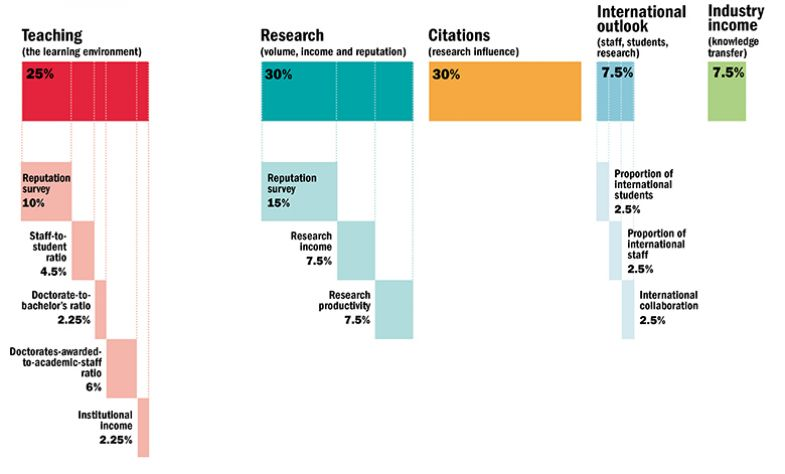

In [756]:
timesData.head(3)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011


<br>

#### Clean data

In [757]:
# Converting data types
#timesData['world_rank'] = pd.to_numeric(timesData['world_rank'], errors='coerce', downcast='integer')
timesData['international'] = timesData['international'].replace('-', np.nan).astype(float)
timesData['income'] = timesData['income'].replace('-', np.nan).astype(float)
timesData['total_score'] = timesData['total_score'].replace('-', np.nan).astype(float)
timesData['num_students'] = timesData['num_students'].str.replace(',', '', regex=True)
timesData['num_students'] = pd.to_numeric(timesData['num_students'], errors='coerce', downcast='integer')
timesData['international_students'] = timesData['international_students'].str.rstrip('%').astype(float) / 100

In [758]:
timesData['t_score'] = (
    0.3 * timesData['teaching'] +
    0.075 * timesData['international'] +
    0.3 * timesData['research'] +
    0.3 * timesData['citations'] +
    0.025 * timesData['income'])

timesData['total_score'] = timesData.apply(lambda row: row['t_score'] if pd.isna(row['total_score']) else row['total_score'], axis=1)

<br>

#### Top 10 universities for each year

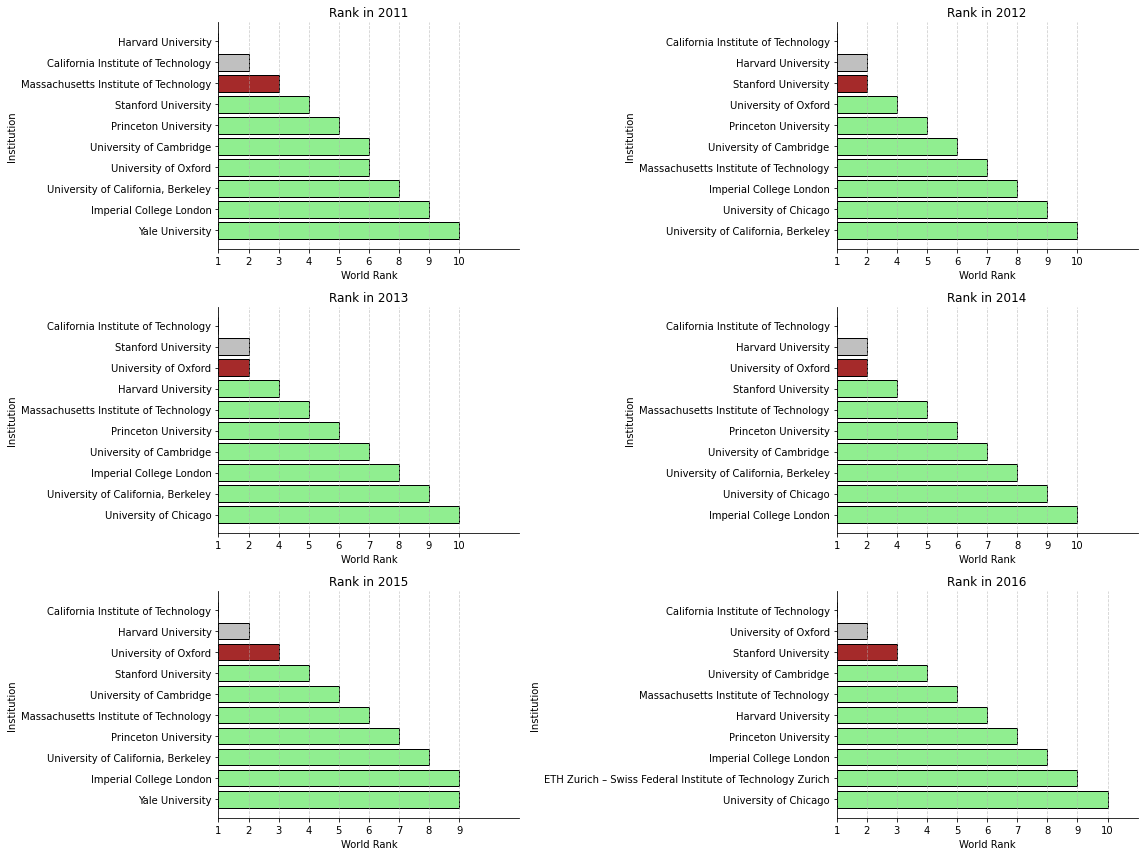

In [759]:
def times_plot_year(nYear, ax):
    data_year_times = timesData[timesData['year'] == nYear].nlargest(10, 'total_score')
    
    colors = ['gold' if idx == 0 else 'silver' if idx == 1 else 'brown' if idx == 2 else 'lightgreen' for idx in range(len(data_year_times))]
    
    ax.barh(data_year_times['university_name'], data_year_times['world_rank'], color=colors, edgecolor='black')
    ax.set_xlabel('World Rank')
    ax.set_ylabel('Institution')
    ax.set_title(f'Rank in {nYear}')
    ax.set_xlim(0, 10)
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

fig, axs = plt.subplots(3, 2, figsize=(16, 12))

years = [2011, 2012, 2013, 2014, 2015, 2016]
for i in range(3):
    for j in range(2):
        times_plot_year(years[i*2 + j], axs[i, j])

plt.tight_layout()

We can observe as a significant difference from CWUR that THE is placing the 3 prestigious universities from UK (Cambridge, Oxford and Imperial College London) in top-10 (while only Cambridge and Oxford are in top-10 by CWUR). Both Cambridge and Oxford are in top 5 for all or a fraction of the years.\
The ranking also sets itself apart from others in that Harvard University is only ranked first in 2011, which distinguishes it from other rankings where Harvard may maintain its top position across multiple years.

<br>

#### Countries ranking

In [760]:
# Grupowanie danych i obliczanie liczby uczelni dla każdego kraju
ct = timesData.groupby('country').agg({'teaching': 'count'}).nlargest(10, 'teaching').reset_index()

# Filtruj dane dla wybranych krajów
filtered_data_ct = timesData[timesData['country'].isin(ct['country'])]

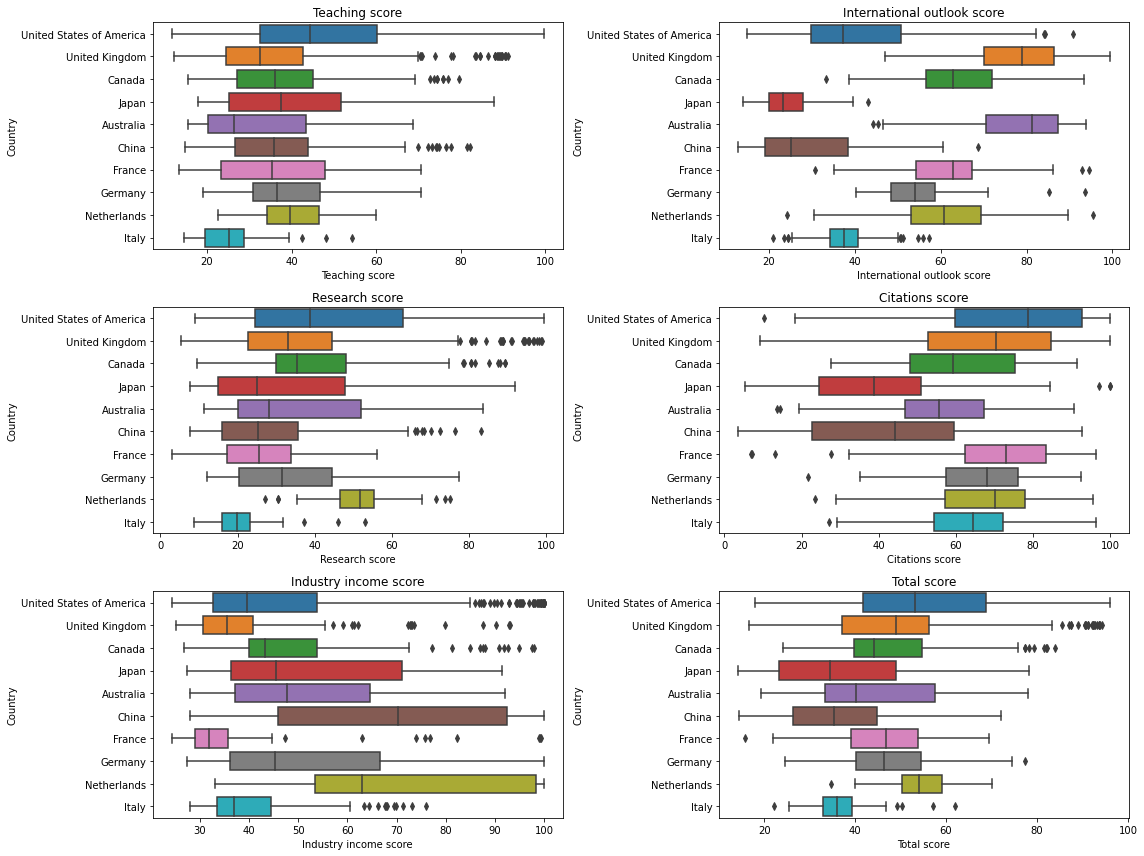

In [761]:
# Tworzenie wykresów pudełkowych z zamienionymi osiami x i y
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
sns.boxplot(x='teaching', y='country', data=filtered_data_ct)
plt.title('Teaching score')
plt.xlabel('Teaching score')
plt.ylabel('Country')

plt.subplot(3, 2, 2)
sns.boxplot(x='international', y='country', data=filtered_data_ct)
plt.title('International outlook score')
plt.xlabel('International outlook score')
plt.ylabel('Country')

plt.subplot(3, 2, 3)
sns.boxplot(x='research', y='country', data=filtered_data_ct)
plt.title('Research score')
plt.xlabel('Research score')
plt.ylabel('Country')

plt.subplot(3, 2, 4)
sns.boxplot(x='citations', y='country', data=filtered_data_ct)
plt.title('Citations score')
plt.xlabel('Citations score')
plt.ylabel('Country')

plt.subplot(3, 2, 5)
sns.boxplot(x='income', y='country', data=filtered_data_ct)
plt.title('Industry income score')
plt.xlabel('Industry income score')
plt.ylabel('Country')

plt.subplot(3, 2, 6)
sns.boxplot(x='total_score', y='country', data=filtered_data_ct)
plt.title('Total score')
plt.xlabel('Total score')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

<br>

#### Number of universities

In [762]:
# Creating a DataFrame and grouping data
ther = timesData.groupby(['country', 'year']).agg(
    nr=('total_score', 'count'),
    minw=('total_score', 'min'),
    maxw=('total_score', 'max'),
    avgw=('total_score', 'mean')
).reset_index()

ther = ther.sort_values(by='year')

# Creating'hover' column
ther['hover'] = ther.apply(lambda row: f"Country: {row['country']}<br>Year: {row['year']}<br>Universities: {row['nr']}<br>Min total score: {row['minw']}<br>Max total score: {row['maxw']}<br>Mean total score: {round(row['avgw'], 0)}<br>", axis=1)

ther.head(3)

,country,year,nr,minw,maxw,avgw,hover
172,Republic of Ireland,2011,2,57.5,60.3,58.900000,Country: Republic of Ireland<br>Year: 2011<br>...
57,Egypt,2011,1,51.6,51.6,51.600000,Country: Egypt<br>Year: 2011<br>Universities: ...
247,United Kingdom,2011,29,47.6,91.2,59.534483,Country: United Kingdom<br>Year: 2011<br>Unive...


In [763]:
fig = px.choropleth(ther, locations="country", locationmode="country names", color="nr",
                    hover_name="hover", projection="natural earth", animation_frame="year",
                    color_continuous_scale='RdYlGn', title='Number of universities')

fig.update_geos(showcoastlines=True, coastlinecolor="gray")
fig.update_layout(coloraxis_colorbar=dict(title='Number of universities', tickprefix=''))
fig.show()

<br>

#### Female percentage

In [764]:
timesData[['female_ratio', 'male_ratio']] = timesData['female_male_ratio'].str.split(' : ', expand=True)

In [765]:
timesData_1 = timesData.dropna(subset=['female_male_ratio'])

In [766]:
timesData_1['female_ratio'] = pd.to_numeric(timesData_1['female_ratio'], errors='coerce')
timesData_1['male_ratio'] = pd.to_numeric(timesData_1['male_ratio'], errors='coerce')

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_18412\184906261.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_18412\184906261.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



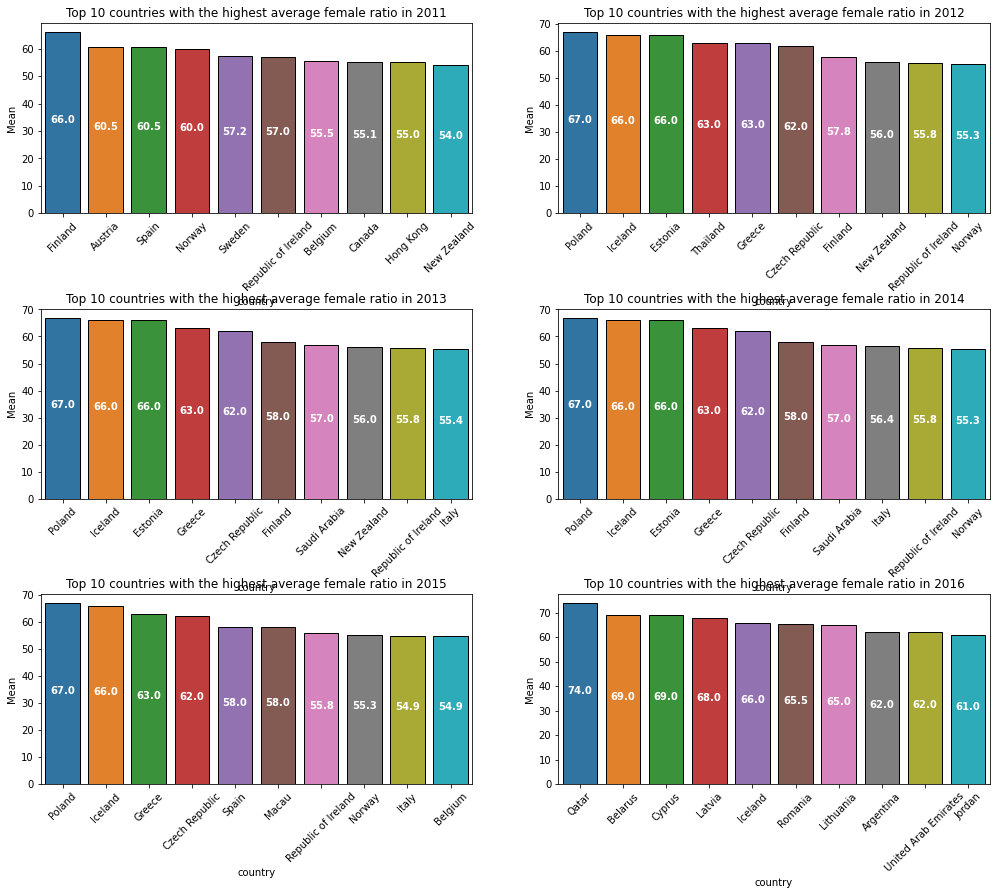

In [767]:
f = timesData_1.groupby(['country', 'year'])['female_ratio'].mean().reset_index()

years = sorted(f['year'].unique())

fig, axes = plt.subplots(3, 2, figsize=(17, 14))
fig.subplots_adjust(hspace=0.5)

for i, year in enumerate(years):
    data_year = f[f['year'] == year]
    data_year = data_year.sort_values(by='female_ratio', ascending=False).head(10)
    
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    
    sns.barplot(x='country', y='female_ratio', data=data_year, ax=ax, edgecolor='black')
    ax.set_ylabel('Mean')
    ax.set_title(f'Top 10 countries with the highest average female ratio in {year}')
    ax.set_xticklabels(data_year['country'], rotation=45)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.1f}', (x + width/2, y + height/2), ha='center', fontsize=10, color='white', fontweight='bold')

<br>

#### Male percentage

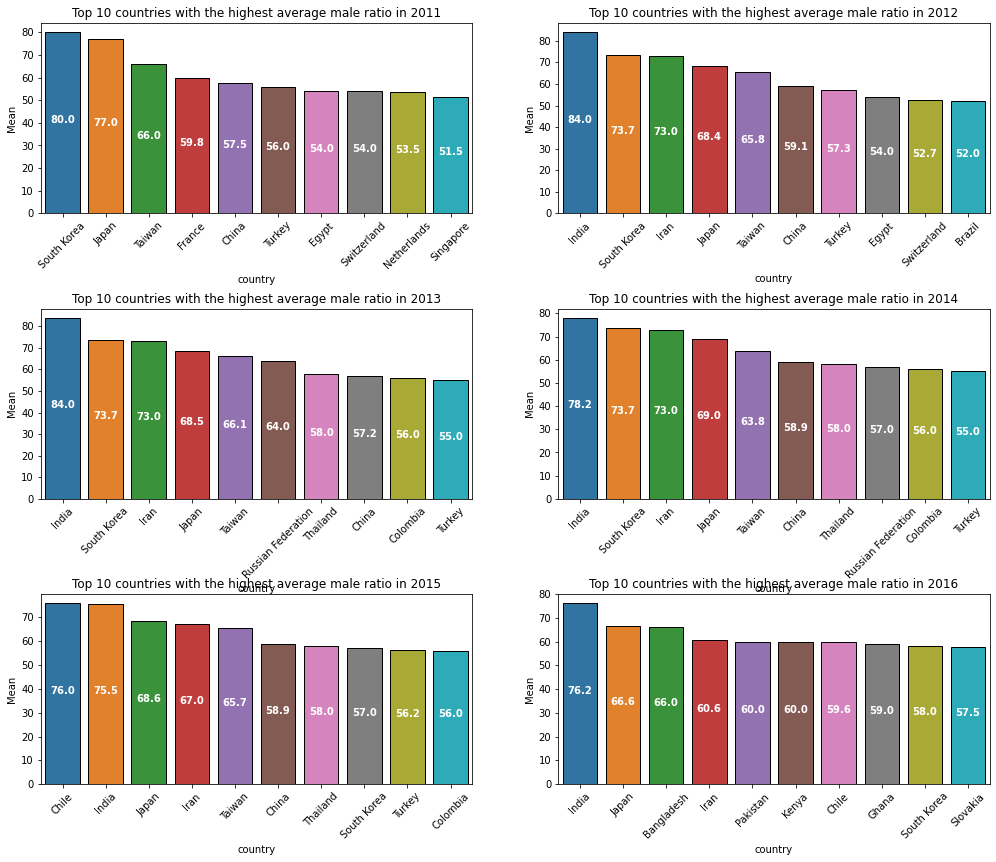

In [768]:
m = timesData_1.groupby(['country', 'year'])['male_ratio'].mean().reset_index()

years = sorted(m['year'].unique())

fig, axes = plt.subplots(3, 2, figsize=(17, 14))
fig.subplots_adjust(hspace=0.5)

for i, year in enumerate(years):
    data_year = m[m['year'] == year]
    data_year = data_year.sort_values(by='male_ratio', ascending=False).head(10)
    
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    
    sns.barplot(x='country', y='male_ratio', data=data_year, ax=ax, edgecolor='black')
    ax.set_ylabel('Mean')
    ax.set_title(f'Top 10 countries with the highest average male ratio in {year}')
    ax.set_xticklabels(data_year['country'], rotation=45)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.1f}', (x + width/2, y + height/2), ha='center', fontsize=10, color='white', fontweight='bold')

<br>

#### International students at top universities

In [769]:
timesData_2 = timesData.dropna(subset=['international_students'])

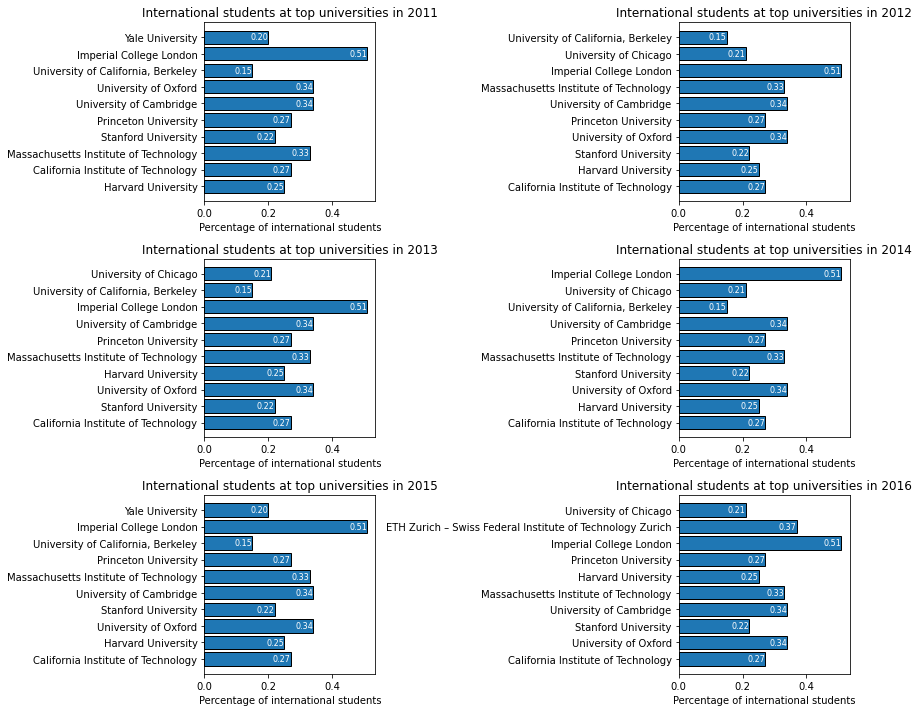

In [770]:
years = timesData_2['year'].unique()

num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

for i, year in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    
    top_10_u = timesData_2[timesData_2['year'] == year].nlargest(10, 'total_score')
    
    bars = axes[row, col].barh(range(1, 11), top_10_u['international_students'])
    
    axes[row, col].set_yticks(range(1, 11))
    axes[row, col].set_yticklabels(top_10_u['university_name'])
    
    axes[row, col].set_xlabel('Percentage of international students')
    
    axes[row, col].set_title(f'International students at top universities in {year}')
    
    for bar in bars:
        bar.set_edgecolor('black')
    for bar in bars:
        width = bar.get_width()
        axes[row, col].text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='right', va='center', fontsize=8, color='white')


plt.tight_layout()
plt.show()

Over the course of time, among the leading global universities, it is generally observed that the proportion of international students falls within the range of 20% to 35%.\
However, there are notable exceptions to this pattern. For instance, in the case of Imperial College London the international student population stands out with an impressive 51%. 

<br>

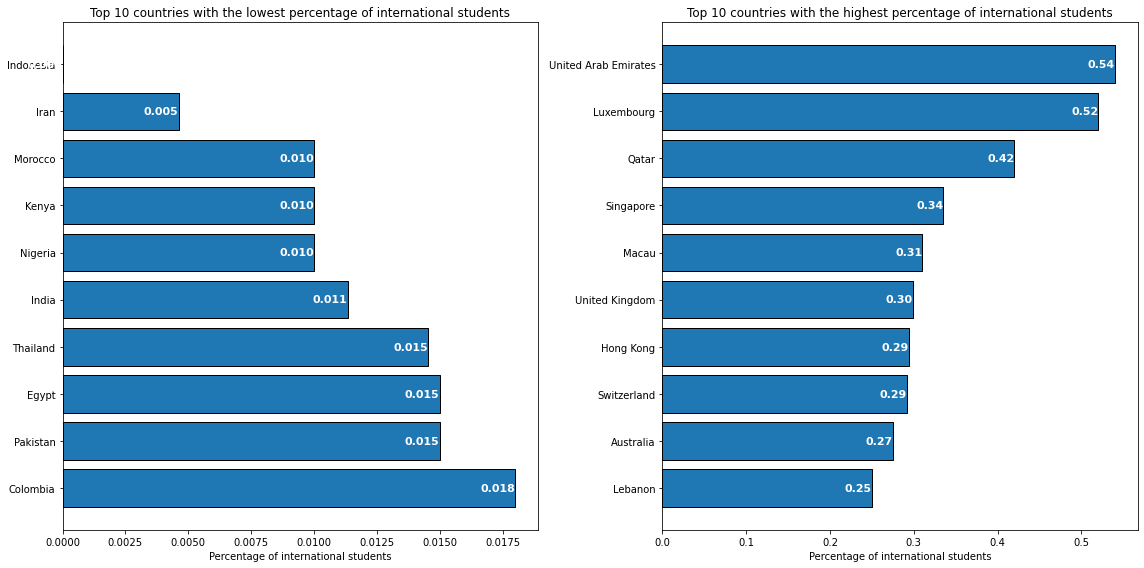

In [771]:
ist = timesData_2.groupby('country')['international_students'].mean().reset_index()

ist_sorted_asc = ist.sort_values(by='international_students', ascending=True)
ist_sorted_desc = ist.sort_values(by='international_students', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.barh(ist_sorted_asc['country'][:10], ist_sorted_asc['international_students'][:10], edgecolor='black')
ax1.set_xlabel('Percentage of international students')
ax1.set_title('Top 10 countries with the lowest percentage of international students')

for i, v in enumerate(ist_sorted_asc['international_students'][:10]):
    ax1.text(v, i, f'{v:.3f}', ha='right', va='center', fontsize=11, color='white', weight='bold')


# Wykres z największymi wartościami
ax2.barh(ist_sorted_desc['country'][:10], ist_sorted_desc['international_students'][:10], edgecolor='black')
ax2.set_xlabel('Percentage of international students')
ax2.set_title('Top 10 countries with the highest percentage of international students')
    
for i, v in enumerate(ist_sorted_desc['international_students'][:10]):
    ax2.text(v, i, f'{v:.2f}', ha='right', va='center', fontsize=11, color='white', weight='bold')
    
# Obróć etykiety na osi x dla czytelności
ax1.invert_yaxis()
ax2.invert_yaxis()

plt.tight_layout()
plt.show()